In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import shapiro

Подключаем таблицу:

In [4]:
data = pd.read_csv("data_anya_point.csv") 
data

,ID,age_month,gender,hand,Raven,RuTOPP_3_NWR,Rythms_repeat,Rythms_instr
0,S02,71,m,правша,23,0.78,0.900,0.90
1,A01,71,f,правша,13,0.58,0.900,0.50
2,T02,74,m,амб,20,0.70,0.900,NaN
3,A02,83,m,правша,24,0.79,0.900,0.70
4,T03,70,f,правша,29,0.75,0.950,1.00
5,T05,83,m,правша,30,0.66,1.000,1.00
6,T06,80,m,правша,26,0.91,0.900,1.00
7,T08,76,f,правша,12,0.83,0.850,1.00
8,A03,76,f,правша,19,0.91,0.950,1.00
9,A04,74,m,правша,30,0.91,1.000,1.00


## Дескриптивная статистика по тестам

среднее значение:

In [5]:
data["RuTOPP_3_NWR"].mean()

0.8053333333333332

In [6]:
data["Rythms_repeat"].mean()

0.9166666666666665

In [7]:
data["Rythms_instr"].mean()

0.9362068965517241

минимальное значение:

In [8]:
min(data["RuTOPP_3_NWR"])

0.58

In [9]:
min(data["Rythms_repeat"])

0.575

In [10]:
min(data["Rythms_instr"])

0.5

максимальное:

In [11]:
max(data["RuTOPP_3_NWR"])

0.95

In [12]:
max(data["Rythms_repeat"])

1.0

In [13]:
max(data["Rythms_instr"])

1.0

стандартное отклонение:

In [14]:
np.std(data["RuTOPP_3_NWR"])

0.09506956517320474

In [15]:
np.std(data["Rythms_repeat"])

0.09227073690444275

In [16]:
np.std(data["Rythms_instr"])

0.13319453735053768

бокс-рлоты по тестам:

In [17]:
box_plot_data = [x, y, z.dropna()]
box = plt.boxplot(box_plot_data, vert=0, patch_artist=True ,labels=['повторение псевдослов', 'повторение ритмов', 'ритмы по инструкции'])
colors = ['red', 'green', 'blue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

NameError: name 'x' is not defined

## Дескрептивная статистика по участникам

### *Возраст*

Средний возраст:

In [18]:
average_age_mounth = data["age_month"].mean()
average_age = average_age_mounth / 12
print(round(average_age_mounth, 2))

75.1


Бокс-плот по возрасту:

<AxesSubplot:>

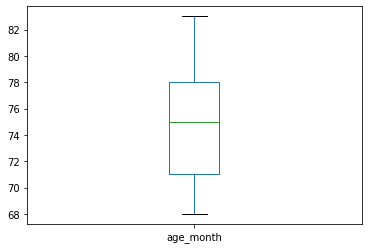

In [19]:
data.boxplot(column =["age_month"], grid = False)

Минимальный возраст:

In [20]:
min(data['age_month'])

68

Максимальный возраст:

In [21]:
max(data['age_month'])

83

Среднее отклонение: 

In [22]:
np.std(data['age_month'])

4.399621195815233

### *Пол*

Числа:

In [23]:
data['gender'].value_counts()

m    20
f    10
Name: gender, dtype: int64

Диаграмма:

Text(0.5, 1.0, 'Гендерное распределение')

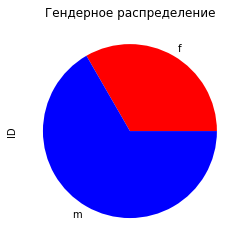

In [24]:
colors = ['red', 'blue']
data.groupby("gender")['ID'].count().plot.pie(figsize=(4, 4), colors=colors)
plt.title("Гендерное распределение")

### *Рукость*

Числа:

In [25]:
data['hand'].value_counts()

правша     20
левша       5
амб         4
правша      1
Name: hand, dtype: int64

Диаграмма:

Text(0.5, 1.0, 'Рукость')

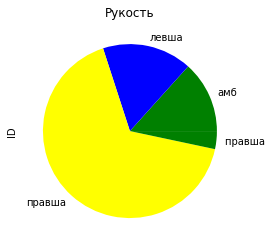

In [26]:
colors = ['green', 'blue', 'yellow']
data.groupby("hand")["ID"].count().plot.pie(figsize=(4, 4), colors=colors)
plt.title("Рукость")

## Статистика

Создаём перемнные по столбцам:

In [27]:
x = data['RuTOPP_3_NWR'] #повторение псевдослов
y = data['Rythms_repeat'] #повторение ритмов
z = data['Rythms_instr'] #ритмы по инструкции
age = data['age_month']

График распределения: повторение псевдослов

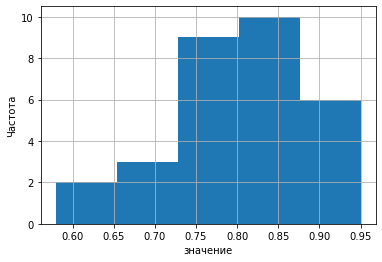

In [28]:
x.hist(bins=5)
plt.xlabel('значение')
plt.ylabel('Частота')
plt.show()

тест Шапиро-Уилка:

In [29]:
stats.shapiro(x)

ShapiroResult(statistic=0.9409974813461304, pvalue=0.09676434844732285)

In [30]:
if stats.shapiro(x)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

Sample looks Gaussian


График распределения: повторение ритмов

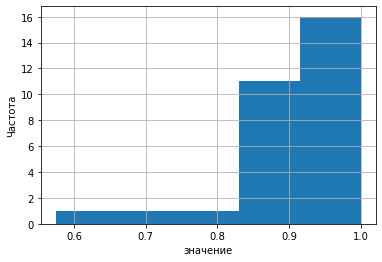

In [31]:
y.hist(bins=5)
plt.xlabel('значение')
plt.ylabel('Частота')
plt.show()

тест Шапиро-Уилка:

In [32]:
stats.shapiro(y)

ShapiroResult(statistic=0.766798734664917, pvalue=1.722091474221088e-05)

In [33]:
if stats.shapiro(y)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

Sample does not look Gaussian


График распределения: ритмы по инструкции

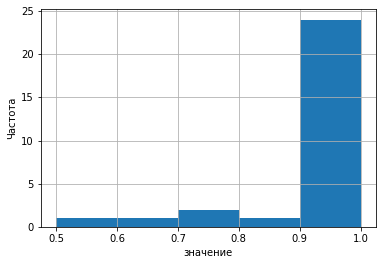

In [34]:
z.hist(bins=5)
plt.xlabel('значение')
plt.ylabel('Частота')
plt.show()

тест Шапиро-Уилка:

In [35]:
stats.shapiro(z.dropna())

ShapiroResult(statistic=0.5469540953636169, pvalue=2.4985586932757542e-08)

In [36]:
if stats.shapiro(z.dropna())[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

Sample does not look Gaussian


### Проверка корреляции

График разброса: повторение псевдослов и повторение ритмов

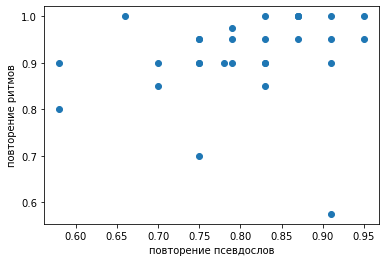

In [37]:
plt.scatter(x, y)
plt.xlabel('повторение псевдослов')
plt.ylabel('повторение ритмов')
plt.show()

График разброса: повторение псевдослов и ритмы по инструкции

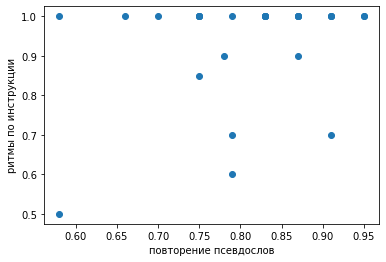

In [38]:
plt.scatter(x, z)
plt.xlabel('повторение псевдослов')
plt.ylabel('ритмы по инструкции')
plt.show()

корреляция Спирмена: повторение псевдослов и повторение ритмов

In [39]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.4001136069749739, pvalue=0.02846381322420432)

In [40]:
def cor_sp(p):
    if p > 0.05:
        print("Samples are uncorrelated;", "p =", p)
    else:
        print("Samples are correlated;", "p =", p)

корреляция Спирмена: повторение псевдослов и ритмы по инструкции

In [41]:
stats.spearmanr(x.drop(2), z.dropna())

SpearmanrResult(correlation=0.17839922379560472, pvalue=0.35449387703363)

### доп. тесты

тест U-тест Манна-Уитни

In [42]:
from scipy.stats import mannwhitneyu

In [43]:
stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=155.0, pvalue=5.970600904846019e-06)

тест Уилкоксона

In [44]:
from scipy.stats import wilcoxon

In [45]:
stats.wilcoxon(x, y)

WilcoxonResult(statistic=33.5, pvalue=6.869427503027056e-05)

Н-тест Крускала-Уоллиса

In [46]:
from scipy.stats import kruskal

In [47]:
stats.kruskal(x, y, z.dropna())

KruskalResult(statistic=31.183009103199886, pvalue=1.693150677283845e-07)

 тест Фридмана

In [48]:
from scipy.stats import friedmanchisquare

In [49]:
stats.friedmanchisquare(x, y, z)

FriedmanchisquareResult(statistic=29.74774774774773, pvalue=3.4702331332773536e-07)

## сравнение по возрастным группам

### младшая группа (до 74 месяцев)

In [50]:
df_gr1 = pd.read_csv("data_anya_group1.csv") 
df_gr1

,ID,age_m,gender,hand,Raven,RuTOPP_3_NWR,Rythms_repeat,Rythms_instr
0,A06,68,f,левша,26,0.83,0.900,1.0
1,T03,70,f,правша,29,0.75,0.950,1.0
2,A07,70,m,правша,18,0.79,0.950,0.6
3,T13,70,m,правша,23,0.58,0.800,1.0
4,T16,70,m,правша,"25,5",0.79,0.975,1.0
5,S02,71,m,правша,23,0.78,0.900,0.9
6,A01,71,f,правша,13,0.58,0.900,0.5
7,A05,71,m,правша,22,0.83,1.000,1.0
8,А12,71,m,правша,19,0.87,1.000,0.9
9,T17,71,m,левша,22,0.95,0.950,1.0


In [51]:
min(df_gr1['age_m']) #min

68

In [52]:
max(df_gr1['age_m']) #max

74

In [53]:
(df_gr1['age_m']).mean() #average

71.26666666666667

In [103]:
np.std(df_gr1["age_m"]) #SD

1.6110727964792766

In [54]:
df_gr1['gender'].value_counts() #gender

m    11
f     4
Name: gender, dtype: int64

переменные:

In [55]:
x1 = df_gr1['RuTOPP_3_NWR'] #повторение псевдослов
y1 = df_gr1['Rythms_repeat'] #повторение ритмов
z1 = df_gr1['Rythms_instr'] #ритмы по инструкции

Тест Шапиро-Уилка:

In [56]:
print(stats.shapiro(x1))

if stats.shapiro(x1)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.9335189461708069, pvalue=0.3077894449234009)
Sample looks Gaussian


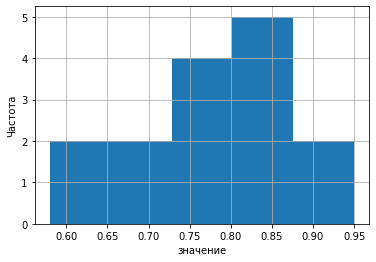

In [57]:
x1.hist(bins=5)
plt.xlabel('значение')
plt.ylabel('Частота')
plt.show()

In [58]:
print(stats.shapiro(y1))

if stats.shapiro(y1)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.8939304947853088, pvalue=0.07692056149244308)
Sample looks Gaussian


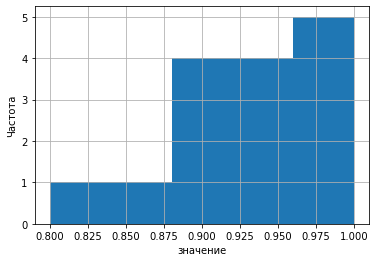

In [59]:
y1.hist(bins=5)
plt.xlabel('значение')
plt.ylabel('Частота')
plt.show()

In [60]:
print(stats.shapiro(z1.dropna()))

if stats.shapiro(z1.dropna())[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.5581471920013428, pvalue=1.7594687960809097e-05)
Sample does not look Gaussian


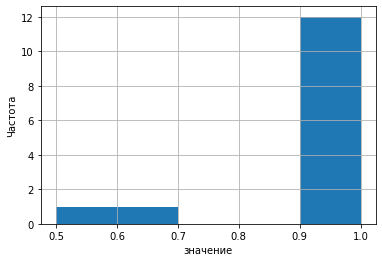

In [61]:
z1.hist(bins=5)
plt.xlabel('значение')
plt.ylabel('Частота')
plt.show()

проверка корреляции:

In [62]:
stats.spearmanr(x1, y1)

SpearmanrResult(correlation=0.7404488223858559, pvalue=0.0015935733846756145)

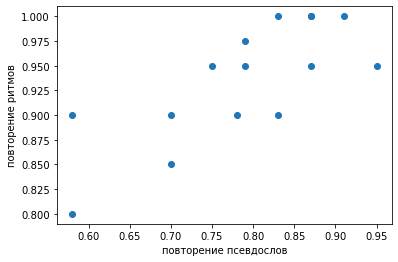

In [63]:
plt.scatter(x1, y1)
plt.xlabel('повторение псевдослов')
plt.ylabel('повторение ритмов')
plt.show()

In [64]:
stats.spearmanr(x1.drop(13), z1.dropna())

SpearmanrResult(correlation=0.291810806367418, pvalue=0.311387604966037)

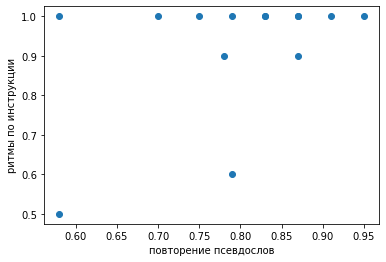

In [65]:
plt.scatter(x1, z1)
plt.xlabel('повторение псевдослов')
plt.ylabel('ритмы по инструкции')
plt.show()

### страшая группа (74-83 месяцев)

In [66]:
df_gr2 = pd.read_csv("data_anya_group2.csv") 
df_gr2

,ID,age_m,gender,hand,Raven,RuTOPP_3_NWR,Rythms_repeat,Rythms_instr
0,T08,76,f,правша,12,0.83,0.850,1.00
1,A03,76,f,правша,19,0.91,0.950,1.00
2,T09,76,m,левша,19,0.75,0.900,1.00
3,A08,76,m,амб,21,0.83,0.900,1.00
4,A13,77,f,правша,20,0.95,1.000,1.00
5,A14,77,f,левша,19,0.75,0.700,1.00
6,T14,78,m,правша,17,0.75,0.950,1.00
7,A16,78,f,правша,30,0.75,0.900,0.85
8,T06,80,m,правша,26,0.91,0.900,1.00
9,A10,80,m,правша,32,0.87,1.000,1.00


In [67]:
min(df_gr2['age_m']) #min

76

In [68]:
max(df_gr2['age_m']) #max

83

In [69]:
(df_gr2['age_m']).mean() #average

78.93333333333334

In [70]:
df_gr2['gender'].value_counts() #gender

m    9
f    6
Name: gender, dtype: int64

In [104]:
np.std(df_gr2["age_m"]) #SD

2.594010194445829

переменные:

In [71]:
x2 = df_gr2['RuTOPP_3_NWR'] #повторение псевдослов
y2 = df_gr2['Rythms_repeat'] #повторение ритмов
z2 = df_gr2['Rythms_instr'] #ритмы по инструкции

Тест Шапиро-Уилка:

In [72]:
print(stats.shapiro(x2))

if stats.shapiro(x2)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.9454013705253601, pvalue=0.4551388621330261)
Sample looks Gaussian


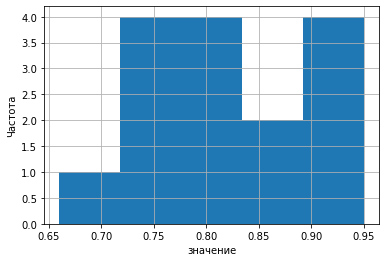

In [73]:
x2.hist(bins=5)
plt.xlabel('значение')
plt.ylabel('Частота')
plt.show()

In [74]:
print(stats.shapiro(y2))

if stats.shapiro(y2)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.7682278752326965, pvalue=0.001479155384004116)
Sample does not look Gaussian


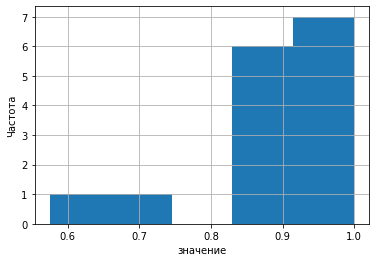

In [75]:
y2.hist(bins=5)
plt.xlabel('значение')
plt.ylabel('Частота')
plt.show()

In [76]:
print(stats.shapiro(z2))

if stats.shapiro(z2)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.5136044025421143, pvalue=4.537997028819518e-06)
Sample does not look Gaussian


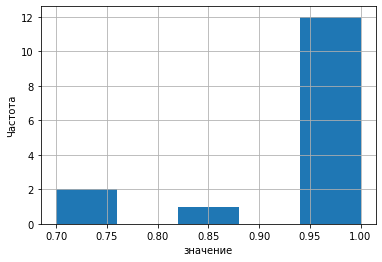

In [77]:
z2.hist(bins=5)
plt.xlabel('значение')
plt.ylabel('Частота')
plt.show()

проверка корреляции:

In [78]:
stats.spearmanr(x2, y2)

SpearmanrResult(correlation=0.12184896708369035, pvalue=0.6653081135599539)

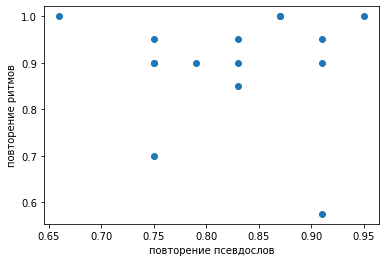

In [79]:
plt.scatter(x2, y2)
plt.xlabel('повторение псевдослов')
plt.ylabel('повторение ритмов')
plt.show()

In [80]:
stats.spearmanr(x2, z2)

SpearmanrResult(correlation=0.02732180220759411, pvalue=0.9230013196410096)

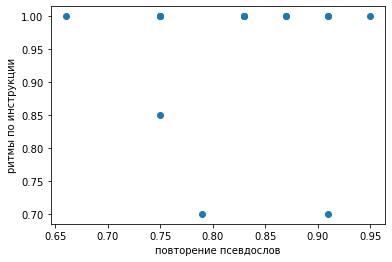

In [81]:
plt.scatter(x2, z2)
plt.xlabel('повторение псевдослов')
plt.ylabel('ритмы по инструкции')
plt.show()

## гендер

In [82]:
df_m = pd.read_csv("data_anya_m.csv") #boys
df_m

,ID,age_m,gender,hand,Raven,RuTOPP_3_NWR,Rythms_repeat,Rythms_instr
0,A07,70,m,правша,18,0.79,0.950,0.6
1,T13,70,m,правша,23,0.58,0.800,1.0
2,T16,70,m,правша,"25,5",0.79,0.975,1.0
3,S02,71,m,правша,23,0.78,0.900,0.9
4,A05,71,m,правша,22,0.83,1.000,1.0
5,А12,71,m,правша,19,0.87,1.000,0.9
6,T17,71,m,левша,22,0.95,0.950,1.0
7,T11,72,m,правша,17,0.70,0.850,1.0
8,А11,73,m,амб,26,0.87,1.000,1.0
9,T02,74,m,амб,20,0.70,0.900,NaN


In [83]:
df_f = pd.read_csv("data_anya_f.csv") #girls
df_f

,ID,age_m,gender,hand,Raven,RuTOPP_3_NWR,Rythms_repeat,Rythms_instr
0,A06,68,f,левша,26,0.83,0.90,1.00
1,T03,70,f,правша,29,0.75,0.95,1.00
2,A01,71,f,правша,13,0.58,0.90,0.50
3,T15,73,f,левша,22,0.87,0.95,1.00
4,T08,76,f,правша,12,0.83,0.85,1.00
5,A03,76,f,правша,19,0.91,0.95,1.00
6,A13,77,f,правша,20,0.95,1.00,1.00
7,A14,77,f,левша,19,0.75,0.70,1.00
8,A16,78,f,правша,30,0.75,0.90,0.85
9,A15,83,f,правша,32,0.87,1.00,1.00


In [84]:
(df_f['age_m']).mean() #average girls

74.9

In [85]:
min((df_f['age_m'])) #min girls

68

In [86]:
max(df_f['age_m']) #max girls

83

In [87]:
(df_m['age_m']).mean() #average boys

75.2

In [88]:
min(df_m['age_m']) #min boys

70

In [89]:
max(df_m['age_m']) #max boys

83

In [90]:
np.std(df_f["age_m"]) #SD girls

4.205948168962618

In [92]:
np.std(df_m["age_m"]) #SD boys

4.489988864128729

переменные:

In [93]:
xm = df_m['RuTOPP_3_NWR'] #повторение псевдослов мальчики
ym = df_m['Rythms_repeat'] #повторение ритмов мальчики
zm = df_m['Rythms_instr'] #ритмы по инструкции мальчики

In [94]:
xf = df_f['RuTOPP_3_NWR'] #повторение псевдослов девочки
yf = df_f['Rythms_repeat'] #повторение ритмов девочки
zf = df_f['Rythms_instr'] #ритмы по инструкции девочки

Тест Шапиро-Уилка:

In [95]:
print(stats.shapiro(xm))

if stats.shapiro(xm)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.9597595930099487, pvalue=0.5390571355819702)
Sample looks Gaussian


In [96]:
print(stats.shapiro(ym))

if stats.shapiro(ym)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.7299520969390869, pvalue=9.253416646970436e-05)
Sample does not look Gaussian


In [97]:
print(stats.shapiro(zm.dropna()))

if stats.shapiro(zm.dropna())[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.5714584589004517, pvalue=2.3127747681428446e-06)
Sample does not look Gaussian


In [98]:
print(stats.shapiro(xf))

if stats.shapiro(xf)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.9206104874610901, pvalue=0.36207476258277893)
Sample looks Gaussian


In [99]:
print(stats.shapiro(yf))

if stats.shapiro(yf)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.8370194435119629, pvalue=0.040638409554958344)
Sample does not look Gaussian


In [100]:
print(stats.shapiro(zf))

if stats.shapiro(zf)[1] > 0.05:
    print("Sample looks Gaussian")
else:
    print("Sample does not look Gaussian")

ShapiroResult(statistic=0.4909113943576813, pvalue=2.8459999157348648e-06)
Sample does not look Gaussian


проверка корреляции:

In [101]:
stats.spearmanr(xm, ym)

SpearmanrResult(correlation=0.2986823196119591, pvalue=0.20083356865888596)

In [102]:
cor_sp(stats.spearmanr(xm, ym)[1])

Samples are uncorrelated; p = 0.20083356865888596


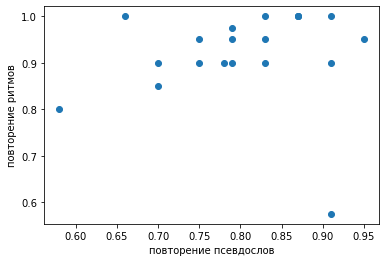

In [128]:
plt.scatter(xm, ym)
plt.xlabel('повторение псевдослов')
plt.ylabel('повторение ритмов')
plt.show()

In [129]:
stats.spearmanr(xm.drop(9), zm.dropna())

SpearmanrResult(correlation=-0.06165858158559223, pvalue=0.8020031392373543)

In [130]:
cor_sp(stats.spearmanr(xm.drop(9), zm.dropna())[1])

Samples are uncorrelated; p = 0.8020031392373543


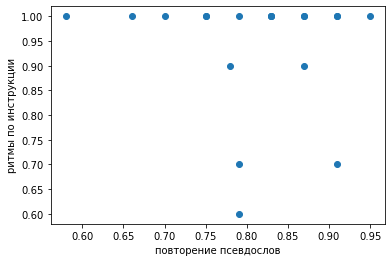

In [131]:
plt.scatter(xm, zm)
plt.xlabel('повторение псевдослов')
plt.ylabel('ритмы по инструкции')
plt.show()

In [132]:
stats.spearmanr(xf, yf)

SpearmanrResult(correlation=0.663522155882196, pvalue=0.0364580624640222)

In [133]:
cor_sp(stats.spearmanr(xf, yf)[1])

Samples are correlated; p = 0.0364580624640222


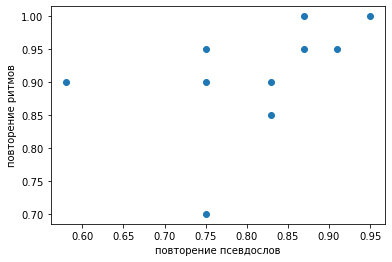

In [134]:
plt.scatter(xf, yf)
plt.xlabel('повторение псевдослов')
plt.ylabel('повторение ритмов')
plt.show()

In [136]:
stats.spearmanr(xf, zf)

SpearmanrResult(correlation=0.6344412685745154, pvalue=0.048803184065713594)

In [137]:
cor_sp(stats.spearmanr(xf, zf)[1])

Samples are correlated; p = 0.048803184065713594


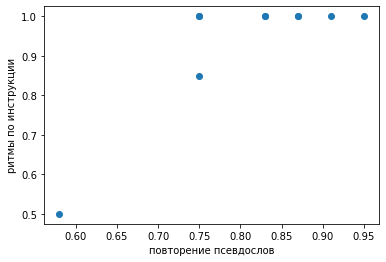

In [138]:
plt.scatter(xf, zf)
plt.xlabel('повторение псевдослов')
plt.ylabel('ритмы по инструкции')
plt.show()

## возраст и гендер

In [9]:
def descript(dp):
    print(min(dp))
    print(max(dp))
    print((dp).mean())
    print(np.std(dp))

младшая возрастная группа, девочки

In [5]:
df_f1 = pd.read_csv("data_anya_f1.csv") 
df_f1

,ID,age_m,gender,hand,Raven,RuTOPP_3_NWR,Rythms_repeat,Rythms_instr
0,A06,68,f,левша,26,0.83,0.90,1.0
1,T03,70,f,правша,29,0.75,0.95,1.0
2,A01,71,f,правша,13,0.58,0.90,0.5
3,T15,73,f,левша,22,0.87,0.95,1.0


In [10]:
descript(df_f1["age_m"])

68
73
70.5
1.8027756377319946


In [141]:
xf1 = df_f1['RuTOPP_3_NWR'] #повторение псевдослов
yf1 = df_f1['Rythms_repeat'] #повторение ритмов
zf1 = df_f1['Rythms_instr'] #ритмы по инструкции

тест Шапиро-Уилка:

In [143]:
for i in [xf1, yf1, zf1]:
    print(stats.shapiro(i))
    if stats.shapiro(i)[1] > 0.05:
        print("Sample looks Gaussian")
    else:
        print("Sample does not look Gaussian")

ShapiroResult(statistic=0.9136841893196106, pvalue=0.5021380186080933)
Sample looks Gaussian
ShapiroResult(statistic=0.7286342978477478, pvalue=0.023856863379478455)
Sample does not look Gaussian
ShapiroResult(statistic=0.6297762393951416, pvalue=0.0012407235335558653)
Sample does not look Gaussian


Проверка корреляции:

In [144]:
stats.spearmanr(xf1, yf1)

SpearmanrResult(correlation=0.4472135954999579, pvalue=0.552786404500042)

In [145]:
stats.spearmanr(xf1, zf1)

SpearmanrResult(correlation=0.7745966692414834, pvalue=0.22540333075851657)

старшая возрастная группа, девочки

In [11]:
df_f2 = pd.read_csv("data_anya_f2.csv") 
df_f2

,ID,age_m,gender,hand,Raven,RuTOPP_3_NWR,Rythms_repeat,Rythms_instr
0,T08,76,f,правша,12,0.83,0.85,1.00
1,A03,76,f,правша,19,0.91,0.95,1.00
2,A13,77,f,правша,20,0.95,1.00,1.00
3,A14,77,f,левша,19,0.75,0.70,1.00
4,A16,78,f,правша,30,0.75,0.90,0.85
5,A15,83,f,правша,32,0.87,1.00,1.00


In [12]:
descript(df_f2["age_m"])

76
83
77.83333333333333
2.4094720491334933


In [151]:
xf2 = df_f2['RuTOPP_3_NWR'] #повторение псевдослов
yf2 = df_f2['Rythms_repeat'] #повторение ритмов
zf2 = df_f2['Rythms_instr'] #ритмы по инструкции

тест Шапиро-Уилка:

In [154]:
for i in [xf2, yf2, zf2]:
    print(stats.shapiro(i))
    if stats.shapiro(i)[1] > 0.05:
        print("Sample looks Gaussian")
    else:
        print("Sample does not look Gaussian")

ShapiroResult(statistic=0.9182394742965698, pvalue=0.49277225136756897)
Sample looks Gaussian
ShapiroResult(statistic=0.8818086385726929, pvalue=0.27746614813804626)
Sample looks Gaussian
ShapiroResult(statistic=0.49609440565109253, pvalue=2.072923962259665e-05)
Sample does not look Gaussian


проверка корреляции:

In [155]:
stats.spearmanr(xf2, yf2)

SpearmanrResult(correlation=0.7941176470588236, pvalue=0.059217891308772586)

In [156]:
stats.spearmanr(xf2, zf2)

SpearmanrResult(correlation=0.5313689313240573, pvalue=0.27796339331848685)

младшая возрастная группа, мальчики:

In [13]:
df_m1 = pd.read_csv("data_anya_m1.csv") 
df_m1

,ID,age_m,gender,hand,Raven,RuTOPP_3_NWR,Rythms_repeat,Rythms_instr
0,A07,70,m,правша,18,0.79,0.950,0.6
1,T13,70,m,правша,23,0.58,0.800,1.0
2,T16,70,m,правша,"25,5",0.79,0.975,1.0
3,S02,71,m,правша,23,0.78,0.900,0.9
4,A05,71,m,правша,22,0.83,1.000,1.0
5,А12,71,m,правша,19,0.87,1.000,0.9
6,T17,71,m,левша,22,0.95,0.950,1.0
7,T11,72,m,правша,17,0.70,0.850,1.0
8,А11,73,m,амб,26,0.87,1.000,1.0
9,T02,74,m,амб,20,0.70,0.900,NaN


In [14]:
descript(df_m1["age_m"])

70
74
71.54545454545455
1.4373989364401725


In [159]:
xm1 = df_m1['RuTOPP_3_NWR'] #повторение псевдослов
ym1 = df_m1['Rythms_repeat'] #повторение ритмов
zm1 = df_m1['Rythms_instr'] #ритмы по инструкции

тест Шапиро-Уилка:

In [160]:
for i in [xm1, ym1, zm1.dropna()]:
    print(stats.shapiro(i))
    if stats.shapiro(i)[1] > 0.05:
        print("Sample looks Gaussian")
    else:
        print("Sample does not look Gaussian")

ShapiroResult(statistic=0.9588356614112854, pvalue=0.7570823431015015)
Sample looks Gaussian
ShapiroResult(statistic=0.8599123954772949, pvalue=0.05743229389190674)
Sample looks Gaussian
ShapiroResult(statistic=0.5593926310539246, pvalue=1.8212775103165768e-05)
Sample does not look Gaussian


проверка корреляции:

In [161]:
stats.spearmanr(xm1, ym1)

SpearmanrResult(correlation=0.8001794375154963, pvalue=0.0030987497887244885)

In [162]:
stats.spearmanr(xm1.drop(9), zm1.dropna())

SpearmanrResult(correlation=0.12435929870268703, pvalue=0.7321322397468482)

старшая возрастная группа, мальчики:

In [15]:
df_m2 = pd.read_csv("data_anya_m2.csv") 
df_m2

,ID,age_m,gender,hand,Raven,RuTOPP_3_NWR,Rythms_repeat,Rythms_instr
0,T09,76,m,левша,19,0.75,0.900,1.0
1,A08,76,m,амб,21,0.83,0.900,1.0
2,T14,78,m,правша,17,0.75,0.950,1.0
3,T06,80,m,правша,26,0.91,0.900,1.0
4,A10,80,m,правша,32,0.87,1.000,1.0
5,A17,80,m,амб,21,0.83,0.950,1.0
6,T10,81,m,правша,27,0.91,0.575,0.7
7,A02,83,m,правша,24,0.79,0.900,0.7
8,T05,83,m,правша,30,0.66,1.000,1.0


In [16]:
descript(df_m2["age_m"])

76
83
79.66666666666667
2.449489742783178


In [165]:
xm2 = df_m2['RuTOPP_3_NWR'] #повторение псевдослов
ym2 = df_m2['Rythms_repeat'] #повторение ритмов
zm2 = df_m2['Rythms_instr'] #ритмы по инструкции

тест Шапиро-Уилка:

In [170]:
for i in [xm2, ym2, zm2]:
    print(stats.shapiro(i))
    if stats.shapiro(i)[1] > 0.05:
        print("Sample looks Gaussian")
    else:
        print("Sample does not look Gaussian")

ShapiroResult(statistic=0.9426416754722595, pvalue=0.6099658608436584)
Sample looks Gaussian
ShapiroResult(statistic=0.6768932342529297, pvalue=0.0007620541146025062)
Sample does not look Gaussian
ShapiroResult(statistic=0.5358099341392517, pvalue=1.6860218238434754e-05)
Sample does not look Gaussian


проверка корреляции:

In [168]:
stats.spearmanr(xm2, ym2)

SpearmanrResult(correlation=-0.4403524229639896, pvalue=0.23553060668414494)

In [169]:
stats.spearmanr(xm2, zm2)

SpearmanrResult(correlation=-0.26207120918047955, pvalue=0.4957330107678882)